# Spatial-Join

En este notebook exploramos la posibilidad de asignar cada instalación de monitorización de ruido del ayuntamiento de Barcelona a un tramo de tránsito mediante la técnica de Spatial-Join.

In [106]:
import os
from pathlib import Path
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, LineString

## Fichero Instalaciones Monitorización de Ruido

1. Importamos CSV como un dataframe de pandas
1. Escoger columnas de latitud y longitud, crear serie de **puntos** de shapely
1. Pandas dataframe + puntos para crear un geodataframe
1. Especificar CRS (Coordinate Reference System) en el geodataframe

In [107]:
# Importamos CSV como dataframe de pandas
instalaciones_filepath = Path(os.getcwd()) / "csv" / "XarxaSoroll_EquipsMonitor_Instal.csv"
df_instalaciones = pd.read_csv(instalaciones_filepath)
df_instalaciones.head(3)

,Id_Instal,Codi_Carrer,Tipus_Via,Nom_Carrer,Num_Carrer,Codi_Barri,Nom_Barri,Codi_Districte,Nom_Districte,Latitud,Longitud,ETRS89_X,ETRS89_Y,Data_Instalacio,Data_DesInstalacio,Font
0,186,348408,C,Tuset,8,26,Galvany,5,Sarrià-Sant Gervasi,41.395450,2.152753,429172.441,4583003.592,29/01/2014,16/01/2015,OCI
1,187,348408,C,Tuset,17,26,Galvany,5,Sarrià-Sant Gervasi,41.396156,2.151564,429073.823,4583082.946,29/01/2014,16/01/2015,OCI
2,206,112208,C,Escudellers,53,2,el Barri Gòtic,1,Ciutat Vella,41.380127,2.176924,431177.000,4581283.000,05/02/2014,30/01/2015,OCI


In [108]:
# Estandarizamos capitalización de las columnas por comodidad
df_instalaciones.columns = [column.lower() for column in df_instalaciones.columns]
df_instalaciones.head(3)

,id_instal,codi_carrer,tipus_via,nom_carrer,num_carrer,codi_barri,nom_barri,codi_districte,nom_districte,latitud,longitud,etrs89_x,etrs89_y,data_instalacio,data_desinstalacio,font
0,186,348408,C,Tuset,8,26,Galvany,5,Sarrià-Sant Gervasi,41.395450,2.152753,429172.441,4583003.592,29/01/2014,16/01/2015,OCI
1,187,348408,C,Tuset,17,26,Galvany,5,Sarrià-Sant Gervasi,41.396156,2.151564,429073.823,4583082.946,29/01/2014,16/01/2015,OCI
2,206,112208,C,Escudellers,53,2,el Barri Gòtic,1,Ciutat Vella,41.380127,2.176924,431177.000,4581283.000,05/02/2014,30/01/2015,OCI


In [109]:
# Generamos las geometrias de los puntos de las instalaciones
puntos = df_instalaciones.apply(lambda row: Point(row["longitud"],row["latitud"]),axis=1)
puntos.head(3)

0     POINT (2.152753 41.39545)
1    POINT (2.151564 41.396156)
2    POINT (2.176924 41.380127)
dtype: object

In [110]:
# Creamos Geodataframe de geopandas indicando las geometrias que hemos calculado
gdf_instalaciones = gpd.GeoDataFrame(df_instalaciones,geometry=puntos)
# Asignamos sistema de referencia como longitud y latitud el código epsg:4326 és un estándard
gdf_instalaciones.crs = "epsg:4326"
gdf_instalaciones.head(3)

,id_instal,codi_carrer,tipus_via,nom_carrer,num_carrer,codi_barri,nom_barri,codi_districte,nom_districte,latitud,longitud,etrs89_x,etrs89_y,data_instalacio,data_desinstalacio,font,geometry
0,186,348408,C,Tuset,8,26,Galvany,5,Sarrià-Sant Gervasi,41.395450,2.152753,429172.441,4583003.592,29/01/2014,16/01/2015,OCI,POINT (2.15275 41.39545)
1,187,348408,C,Tuset,17,26,Galvany,5,Sarrià-Sant Gervasi,41.396156,2.151564,429073.823,4583082.946,29/01/2014,16/01/2015,OCI,POINT (2.15156 41.39616)
2,206,112208,C,Escudellers,53,2,el Barri Gòtic,1,Ciutat Vella,41.380127,2.176924,431177.000,4581283.000,05/02/2014,30/01/2015,OCI,POINT (2.17692 41.38013)


<Axes: >

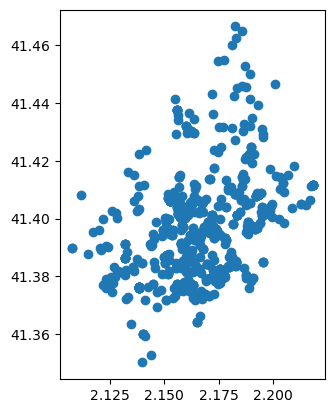

In [111]:
# Visualizamos los puntos
gdf_instalaciones.plot()

## Fichero Tramos

De manera similar al fichero de instalaciones de ruido

1. Importamos CSV como un dataframe de pandas
1. Escoger columnas de latitud y longitud, crear serie de **lineas** de shapely
1. Pandas dataframe + puntos para crear un geodataframe
1. Especificar CRS (Coordinate Reference System) en el geodataframe

In [112]:
tramos_filepath = Path(os.getcwd()) / "csv" / "transit_relacio_trams.csv"
df_tramos = pd.read_csv(tramos_filepath)
df_tramos.head(3)

,Tram,Descripció,Coordenades
0,1,Diagonal (Ronda de Dalt a Doctor Marañón),"2.11203535639414,41.3841912394771,2.1015028628..."
1,2,Diagonal (Doctor Marañón a Ronda de Dalt),"2.111944376806616,41.38446666680338,2.10159408..."
2,3,Diagonal (Doctor Marañón a Pl. Pius XII),"2.112093343037027,41.38422850920645,2.12264979..."


In [113]:
df_tramos.columns = [column.lower() for column in df_tramos.columns]
df_tramos.head(3)

,tram,descripció,coordenades
0,1,Diagonal (Ronda de Dalt a Doctor Marañón),"2.11203535639414,41.3841912394771,2.1015028628..."
1,2,Diagonal (Doctor Marañón a Ronda de Dalt),"2.111944376806616,41.38446666680338,2.10159408..."
2,3,Diagonal (Doctor Marañón a Pl. Pius XII),"2.112093343037027,41.38422850920645,2.12264979..."


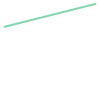

In [114]:
# A juzgar por las coordenadas, los tramos són lineas y no rectangulos
point_coord = df_tramos.coordenades[1].split(",")
pairs = [(point_coord[i], point_coord[i + 1]) for i in range(0, len(point_coord), 2)]
LineString(pairs)

In [115]:
# Aplicamos transformaciones necesarias para generar los puntos
lines = df_tramos\
    .apply(lambda row: row.coordenades.split(","), axis=1)\
    .apply(lambda point_coord: [(float(point_coord[i]), float(point_coord[i + 1])) for i in range(0, len(point_coord), 2)])\
    .apply(lambda pairs: LineString(pairs))
lines.head()

0    LINESTRING (2.11203535639414 41.3841912394771,...
1    LINESTRING (2.111944376806616 41.3844666668033...
2    LINESTRING (2.112093343037027 41.3842285092064...
3    LINESTRING (2.122592049318304 41.3871909418920...
4    LINESTRING (2.122657659295115 41.3869419579467...
dtype: object

In [116]:
# Creamos GeoDataFrame con las geometrias que hemos escogido
gdf_tramos = gpd.GeoDataFrame(df_tramos, geometry=lines)
# Asignamos sistema de referencia como longitud y latitud el código epsg:4326 és un estándard
gdf_tramos.crs = "epsg:4326"
gdf_tramos.head(3)

,tram,descripció,coordenades,geometry
0,1,Diagonal (Ronda de Dalt a Doctor Marañón),"2.11203535639414,41.3841912394771,2.1015028628...","LINESTRING (2.11204 41.38419, 2.1015 41.38163)"
1,2,Diagonal (Doctor Marañón a Ronda de Dalt),"2.111944376806616,41.38446666680338,2.10159408...","LINESTRING (2.11194 41.38447, 2.10159 41.38187)"
2,3,Diagonal (Doctor Marañón a Pl. Pius XII),"2.112093343037027,41.38422850920645,2.12264979...","LINESTRING (2.11209 41.38423, 2.12265 41.38693)"


<Axes: >

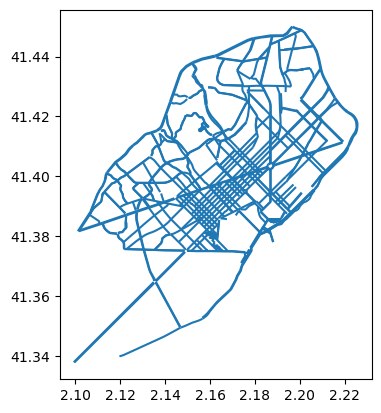

In [117]:
# Parecen las calles de barcelona incompletas pero es lo que esperábamos, no hay monitorización del estado del tránsito en todas las calles
gdf_tramos.plot()

# Join Espacial

En este punto tenemos los dos dataframes espaciales preparados y en los mismos rangos de longitud y latitud. La intuición nos dice que en los tramos puede haber más de un monitor de ruido, pero que un monitor de ruido sólo deberia estar instalado en un tramo.
Entonces el tipo de join tiene que ser un left join **instalaciones <- tramos** para obtener una tabla de mapeo.

In [118]:
# Tipos de predicado válido para sjoin.
gdf_instalaciones.sindex.valid_query_predicates

{None,
 'contains',
 'contains_properly',
 'covered_by',
 'covers',
 'crosses',
 'dwithin',
 'intersects',
 'overlaps',
 'touches',
 'within'}

In [119]:
# Convertimos CRS al CRS proyectado más exacto para la zona de Barcelona. En este caso cogemos la respuesta de ChatGPT para no desviar-nos de lo que nos ocupa. Es un tema que se podría estudiar en más profundidad.
gdf_instalaciones.to_crs(epsg=25831)
gdf_tramos.to_crs(epsg=25831);

In [120]:
# Vamos a ignorar el warning por que ya hemos tenido en cuenta su mensaje previamente.
ubicaciones = gpd.sjoin_nearest(gdf_instalaciones,gdf_tramos,how="left",max_distance=10)
ubicaciones.head(3)

c:\Users\Miki\miniconda3\envs\powerbi\Lib\site-packages\geopandas\array.py:403: UserWarning: Geometry is in a geographic CRS. Results from 'sjoin_nearest' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  warnings.warn(


,id_instal,codi_carrer,tipus_via,nom_carrer,num_carrer,codi_barri,nom_barri,codi_districte,nom_districte,latitud,...,etrs89_x,etrs89_y,data_instalacio,data_desinstalacio,font,geometry,index_right,tram,descripció,coordenades
0,186,348408,C,Tuset,8,26,Galvany,5,Sarrià-Sant Gervasi,41.395450,...,429172.441,4583003.592,29/01/2014,16/01/2015,OCI,POINT (2.15275 41.39545),103,104,Diagonal (Balmes a Pl. Francesc Macià),"2.145092239861253,41.39293570944426,2.15461581..."
1,187,348408,C,Tuset,17,26,Galvany,5,Sarrià-Sant Gervasi,41.396156,...,429073.823,4583082.946,29/01/2014,16/01/2015,OCI,POINT (2.15156 41.39616),101,102,Travessera de Gràcia (Aribau a Via Augusta),"2.149330405746273,41.39593880954032,2.15319461..."
2,206,112208,C,Escudellers,53,2,el Barri Gòtic,1,Ciutat Vella,41.380127,...,431177.000,4581283.000,05/02/2014,30/01/2015,OCI,POINT (2.17692 41.38013),291,292,Passeig de Colom (Pl. Antonio López a Pl. Port...,"2.182102513985287,41.38137656982789,2.17789501..."


In [121]:
# Exportamos a CSV
ubicaciones.to_csv("./csv/ubicaciones.csv")

## Referencias de interés
* [What is a coordinate reference system CRS?](https://www.youtube.com/watch?v=xJyJlKbZFlc&list=PLewNEVDy7gq3DjrPDxGFLbHE4G2QWe8Qh&index=8)
* [Opening CSV files with GeoPandas](https://www.youtube.com/watch?v=EsSU0SSBPw8&list=PLewNEVDy7gq3DjrPDxGFLbHE4G2QWe8Qh&index=7)
* [Spatial joins with Geopandas](https://www.youtube.com/watch?v=y85IKthrV-s&list=PLewNEVDy7gq3DjrPDxGFLbHE4G2QWe8Qh&index=11)
* [Spatial joins with Geopanadas 2](https://www.youtube.com/watch?v=mV8bqV2j46M&list=PLewNEVDy7gq3DjrPDxGFLbHE4G2QWe8Qh&index=12)
* [Geopandas Documentation](https://geopandas.org/en/stable/docs.html)
* [Shapely User Manual](https://shapely.readthedocs.io/en/stable/manual.html)